## Context

## Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("Fraud.csv")

In [3]:
Data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
Data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
Data.describe().astype("int")

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [8]:
Data.shape

(6362620, 11)

## Exploratory Data Analysis

In [9]:
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Text(0, 0.5, 'Frequency')

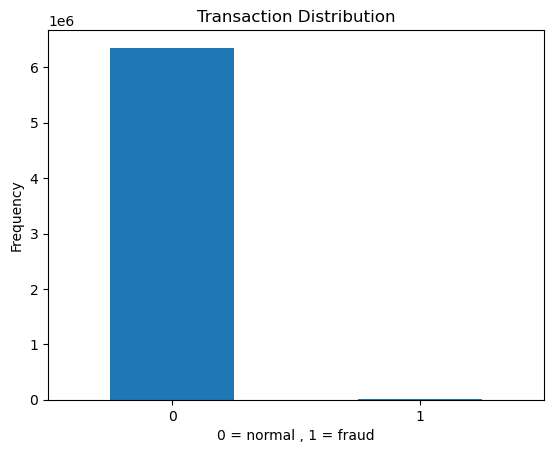

In [10]:
count_class = pd.value_counts(Data['isFraud'],sort=True)
count_class.plot(kind="bar",rot=0)
plt.title("Transaction Distribution")
plt.xlabel("0 = normal , 1 = fraud")
plt.ylabel("Frequency")

In [11]:
Fraud = Data[Data["isFraud"]==1]
Normal = Data[Data["isFraud"]==0]
print("Fraud Trasaction",Fraud.shape)
print("Normal Trasaction",Normal.shape)

Fraud Trasaction (8213, 11)
Normal Trasaction (6354407, 11)


In [12]:
Fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [13]:
Normal.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [14]:
Fraud.amount.describe().astype("int")

count        8213
mean      1467967
std       2404252
min             0
25%        127091
50%        441423
75%       1517771
max      10000000
Name: amount, dtype: int32

In [15]:
Normal.amount.describe().astype("int")

count     6354407
mean       178197
std        596236
min             0
25%         13368
50%         74684
75%        208364
max      92445516
Name: amount, dtype: int32

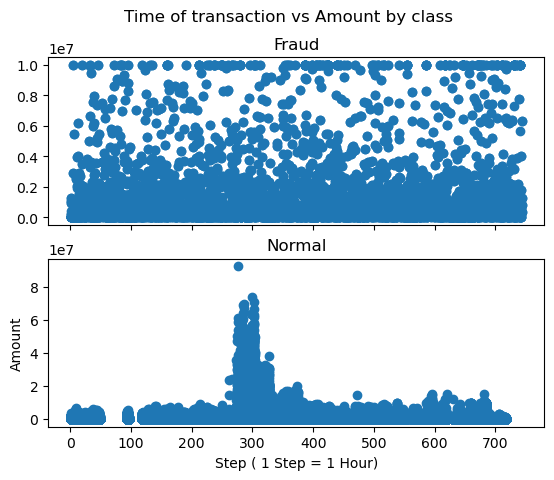

In [16]:
# We Will check Do fraudulent transactions occur more often during certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.step, Fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.step, Normal.amount)
ax2.set_title('Normal')
plt.xlabel('Step ( 1 Step = 1 Hour)')
plt.ylabel('Amount')
plt.show()

In [17]:
#Taking some sample of the data

Data1=Data.sample(frac=0.1,random_state=1)
Data1.shape

(636262, 11)

In [18]:
Fraud = Data1[Data1['isFraud']==1]

Valid = Data1[Data1['isFraud']==0]

Outlier_Fraction = len(Fraud)/float(len(Valid))




In [19]:
print(Outlier_Fraction)
print("Fraud cases {}".format(len(Fraud)))
print("valid Cases {}".format(len(Valid)))

0.0012888646188564514
Fraud cases 819
valid Cases 635443


### Observations :
Dataset is Imbalanced Fraud Transaction is less as comapre to Normal Transaction

## Data Preprocessing

In [21]:
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
# Droping Unwanted vairable that has no use
Data=Data.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [23]:
Data.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


In [24]:
Data["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## OHE

1) thier is 5 unique values 

2) to treat this value use one hot encoding because thier is no order

3) if we do the label encoding, the model will treat it as a numerical feature  which has different numeric values and hence it will not work as expected      where in here the goal is to treat the feature as a categorical one hence the one hot encoding should be used

In [25]:
Dummies =pd.get_dummies(Data['type'])


In [26]:
Dummies = Dummies.drop(['CASH_IN'],axis=1)

In [27]:
Dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [28]:
Data=pd.concat([Data,Dummies],axis=1).drop(['type'],axis=1)
Data.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0


## Train Test  Split 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# ALL the vairable are independent except isFraud so we will put it separate

X_train,X_test,Y_train,Y_test = train_test_split(Data.drop("isFraud",axis=1),Data.isFraud,test_size=0.2,random_state=False)

In [42]:
Y_train.shape, Y_test.shape

((5090096,), (1272524,))

In [32]:
Y_test.head(5)

4644207    0
3800666    0
4426240    0
5788765    0
2010701    0
Name: isFraud, dtype: int64

In [33]:
X_train.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1657090,158,99986.73,7845.07,0.00,914025.09,1014011.83,1,0,0,0
3056545,234,62405.63,16603.00,0.00,466525.55,528931.18,1,0,0,0
224722,14,2291393.07,0.00,0.00,3729395.93,6020789.00,0,0,0,1
495935,20,14173.77,11447430.20,11461603.97,3047711.43,3033537.66,0,0,0,0
4412383,322,301264.36,0.00,0.00,806211.40,1107475.76,1,0,0,0


In [43]:
Y_train.value_counts()/len(Y_test)

0    3.994835
1    0.005165
Name: isFraud, dtype: float64

In [44]:
Y_test.value_counts()/len(Y_test)

0    0.99871
1    0.00129
Name: isFraud, dtype: float64

# Model Selection

## Logistic Regression - unsampled data

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,precision_recall_curve

In [35]:
model =LogisticRegression()
model

LogisticRegression()

In [36]:
model.fit(X_train,Y_train)

LogisticRegression()

In [37]:
model.score(X_test,Y_test)

0.998257007333457

In [38]:
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
cm = confusion_matrix(Y_test,predict)

Text(50.722222222222214, 0.5, 'actuals')

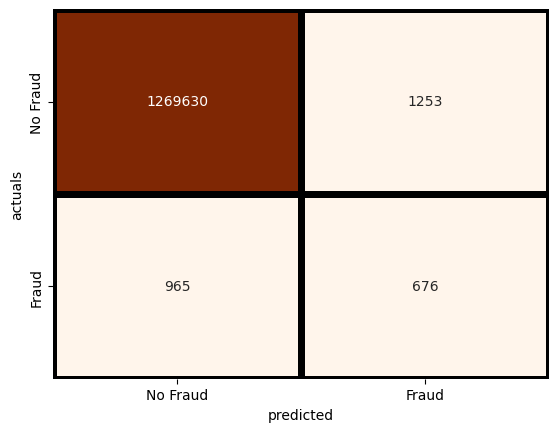

In [40]:
sns.heatmap(cm,cmap='Oranges',annot=True,fmt='d',cbar=False,linecolor='Black',linewidths=5)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

## Obsevation

1)Dataset is imblanced Logistic Regression accuracy we get 99% if we give any value to the model it will predicit only no fraud 

2)To overcome imblanced data problem we will use SMOTE techinique to handle imblanace data

# SMOTE Technique

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(Y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, Y_train = smt.fit_resample(X_train, Y_train)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)

counter = Counter(Y_train_sm)
print('After',counter)

Before Counter({0: 5083524, 1: 6572})
After Counter({0: 5083524, 1: 5083524})


## SMOTE Resampling

In [62]:
model2 =LogisticRegression()
model2

LogisticRegression()

In [63]:
model2.fit(X_train_sm,Y_train_sm)

LogisticRegression()

In [64]:
model2.score(X_test,Y_test)

0.9223763166745774

## Model Evalution

In [66]:
model = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [74]:
def test_eval(model2,X_test,Y_test,algo=None,Smapling=None):
    Y_prob=model2.predict_proba(X_test)
    Y_pred=model2.predict(X_test)
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(Y_test,Y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(Y_test,Y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(Y_test, Y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(Y_test,Y_pred))
    recall.append(recall_score(Y_test,Y_pred))
    F1score.append(f1_score(Y_test,Y_pred))
    AUCROC.append(roc_auc_score(Y_test, Y_prob[:,1]))
   

In [75]:
test_eval(model2,X_test,Y_test,'Logistic Regression','SMOTE')

Confusion Matrix
[[1172267   98616]
 [    162    1479]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270883
           1       0.01      0.90      0.03      1641

    accuracy                           0.92   1272524
   macro avg       0.51      0.91      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524
 

AUC-ROC
0.965034557635244
